<a href="https://colab.research.google.com/github/Vishwateja05/ADM-PROJECT/blob/main/ADM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [5]:
# Load the dataset
df = pd.read_csv('Global_Music_Streaming_Listener_Preferences.csv')
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

In [6]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Number of Songs Liked                       0
Most Played Artist                          0
Subscription Type                           0
Listening Time (Morning/Afternoon/Night)    0
Discover Weekly Engagement (%)              0
Repeat Song Rate (%)                        0
dtype: int64
Duplicate rows: 0


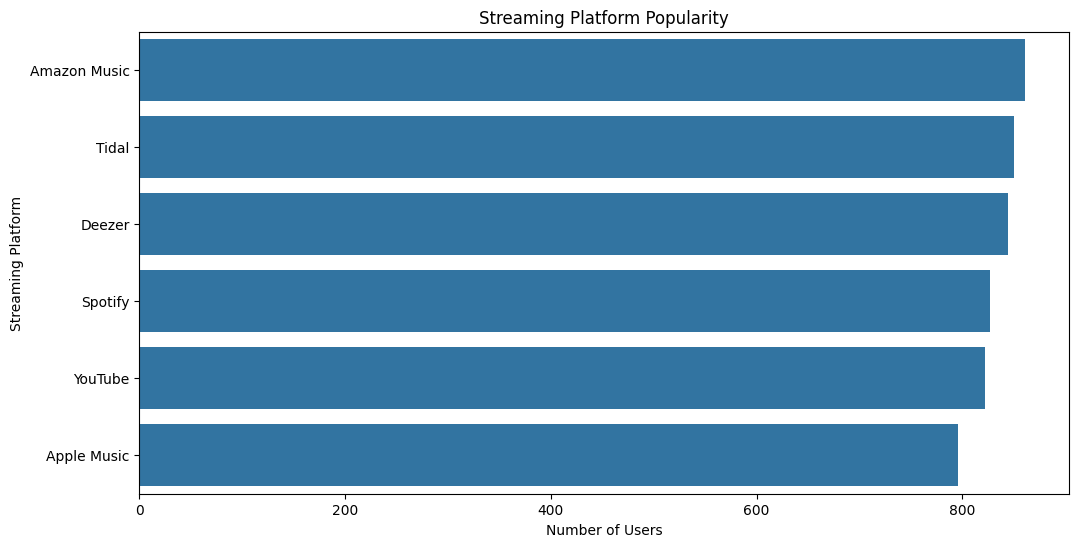

In [7]:
# Convert categorical columns to proper data types
categorical_cols = ['Country', 'Streaming Platform', 'Top Genre', 'Most Played Artist',
'Subscription Type', 'Listening Time (Morning/Afternoon/Night)']
for col in categorical_cols:
    df[col] = df[col].astype('category')
# Convert percentage columns to decimal (0-1)
percentage_cols = ['Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
for col in percentage_cols:
    df[col] = df[col] / 100
# Platform popularity
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Streaming Platform', order=df['Streaming Platform'].value_counts().index)
plt.title('Streaming Platform Popularity')
plt.xlabel('Number of Users')
plt.show()

<ipython-input-8-698d296c0ba1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_by_country = df.groupby(['Country', 'Streaming Platform']).size().unstack().fillna(0)


<Figure size 1500x800 with 0 Axes>

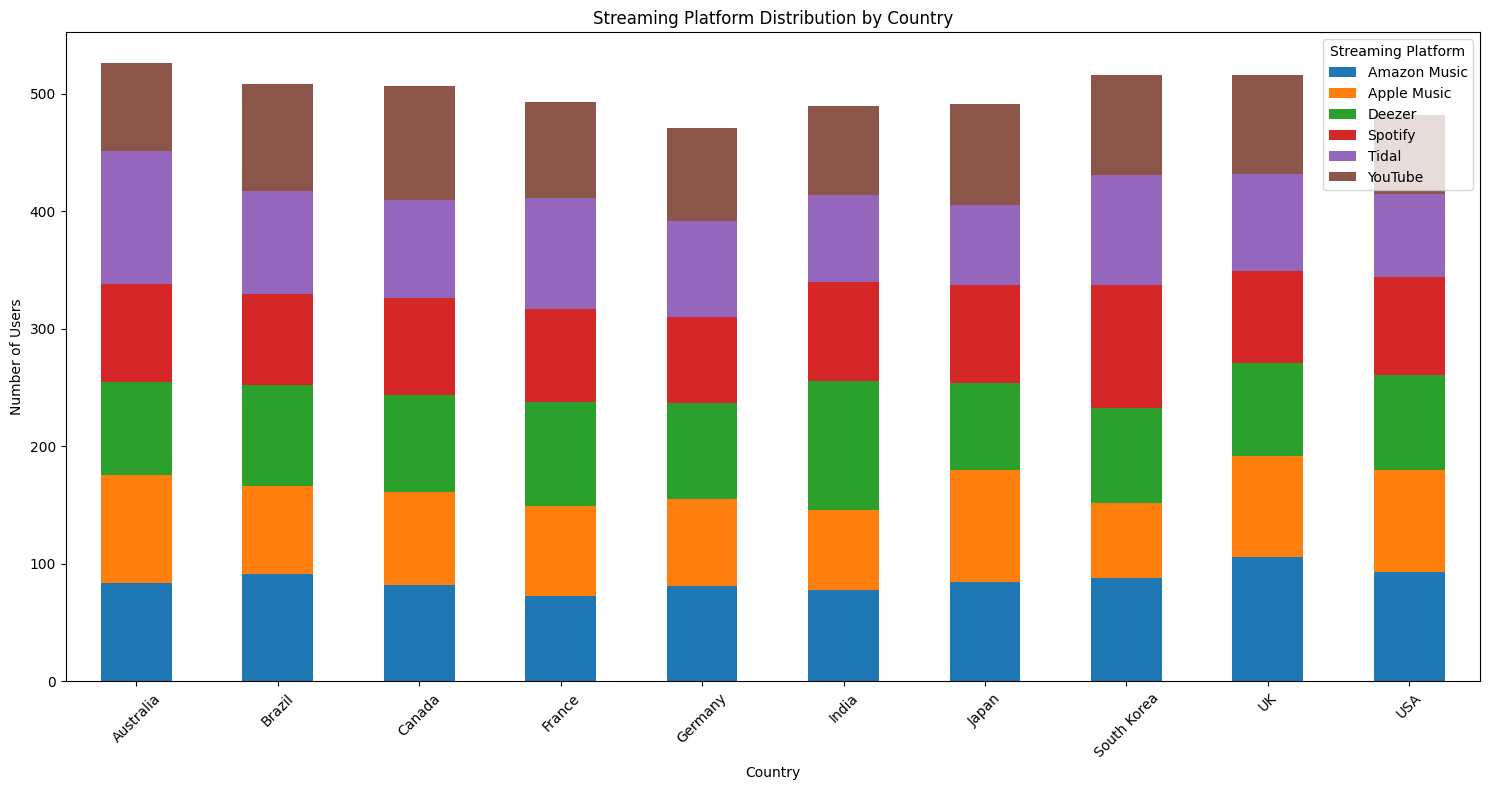

In [8]:
# Platform by country
plt.figure(figsize=(15, 8))
platform_by_country = df.groupby(['Country', 'Streaming Platform']).size().unstack().fillna(0)
platform_by_country.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Streaming Platform Distribution by Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

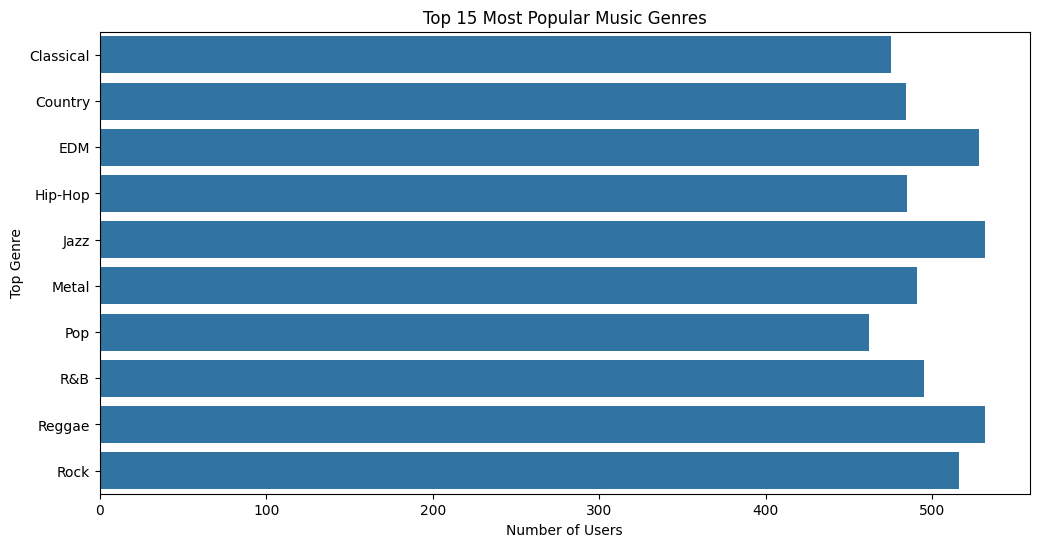

In [9]:
# Top genres overall
top_genres = df['Top Genre'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 15 Most Popular Music Genres')
plt.xlabel('Number of Users')
plt.show()

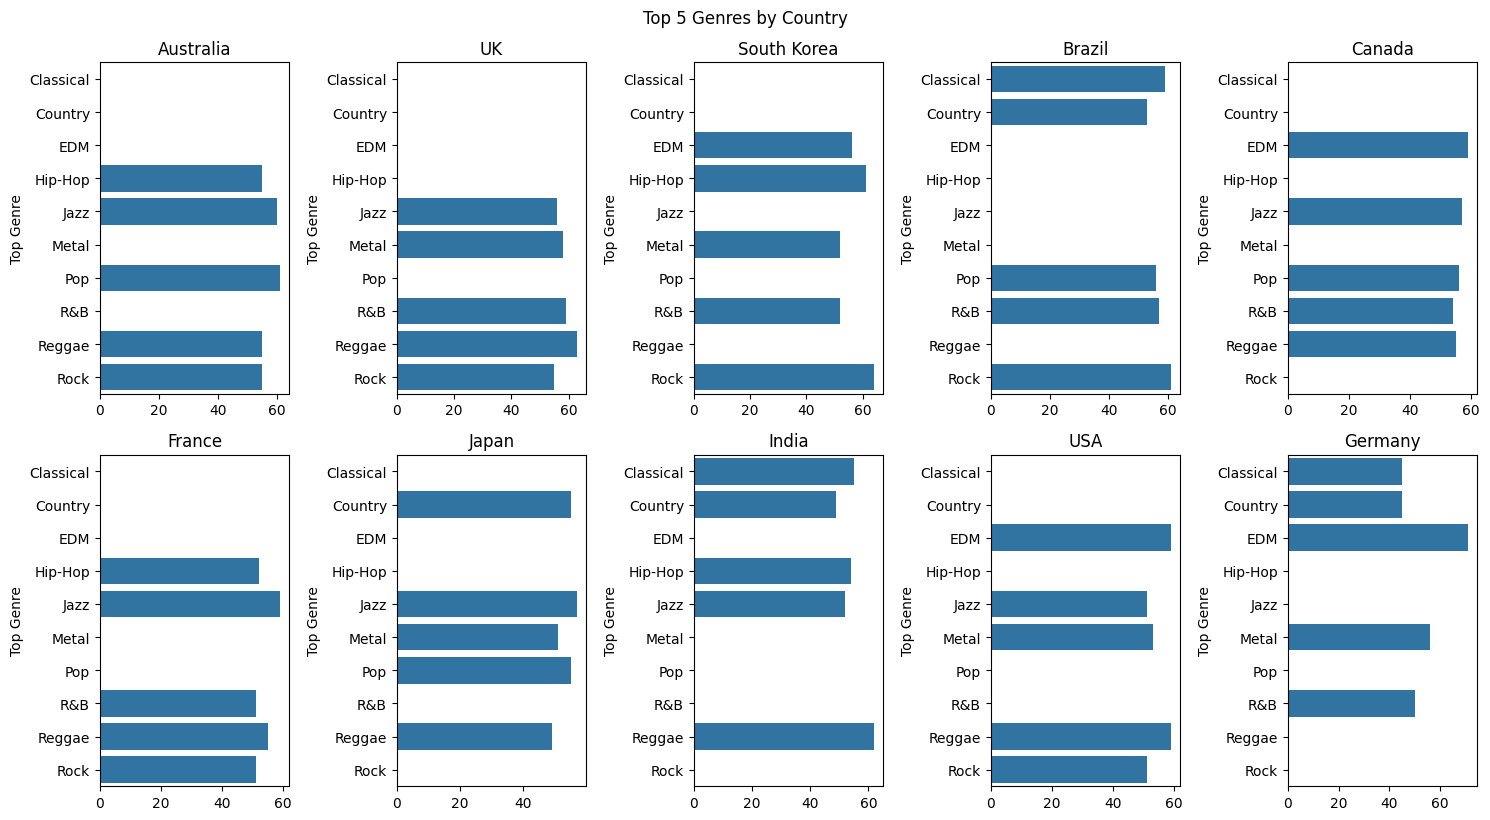

In [10]:
# Genre by country
top_countries = df['Country'].value_counts().head(10).index
plt.figure(figsize=(15, 8))
for i, country in enumerate(top_countries):
    plt.subplot(2, 5, i+1)
    country_genres = df[df['Country'] == country]['Top Genre'].value_counts().head(5)
    sns.barplot(x=country_genres.values, y=country_genres.index)
    plt.title(country)
    plt.tight_layout()
plt.suptitle('Top 5 Genres by Country', y=1.02)
plt.show()

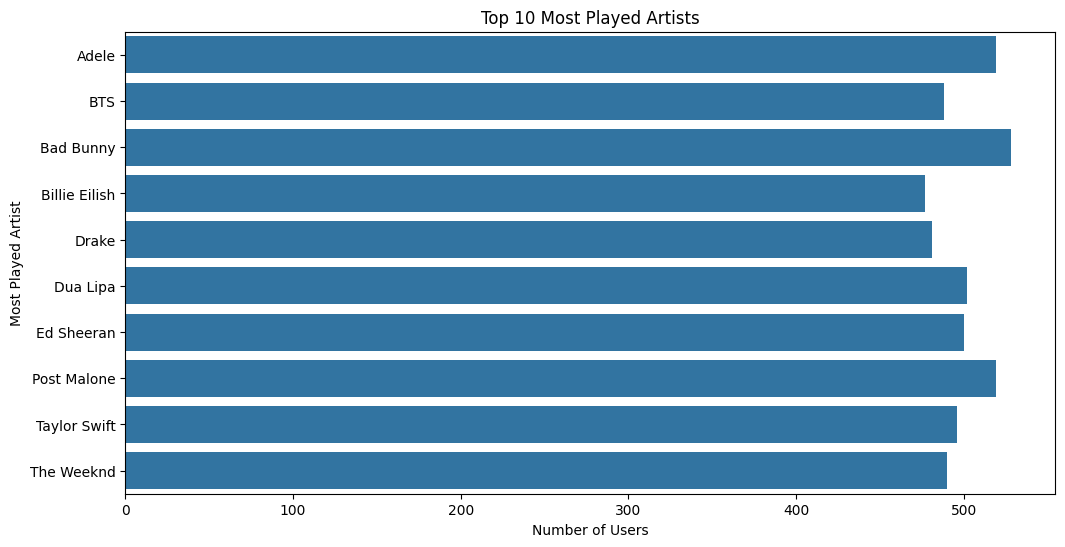

In [11]:
# Top 10 most played artists
top_artists = df['Most Played Artist'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Most Played Artists')
plt.xlabel('Number of Users')
plt.show()

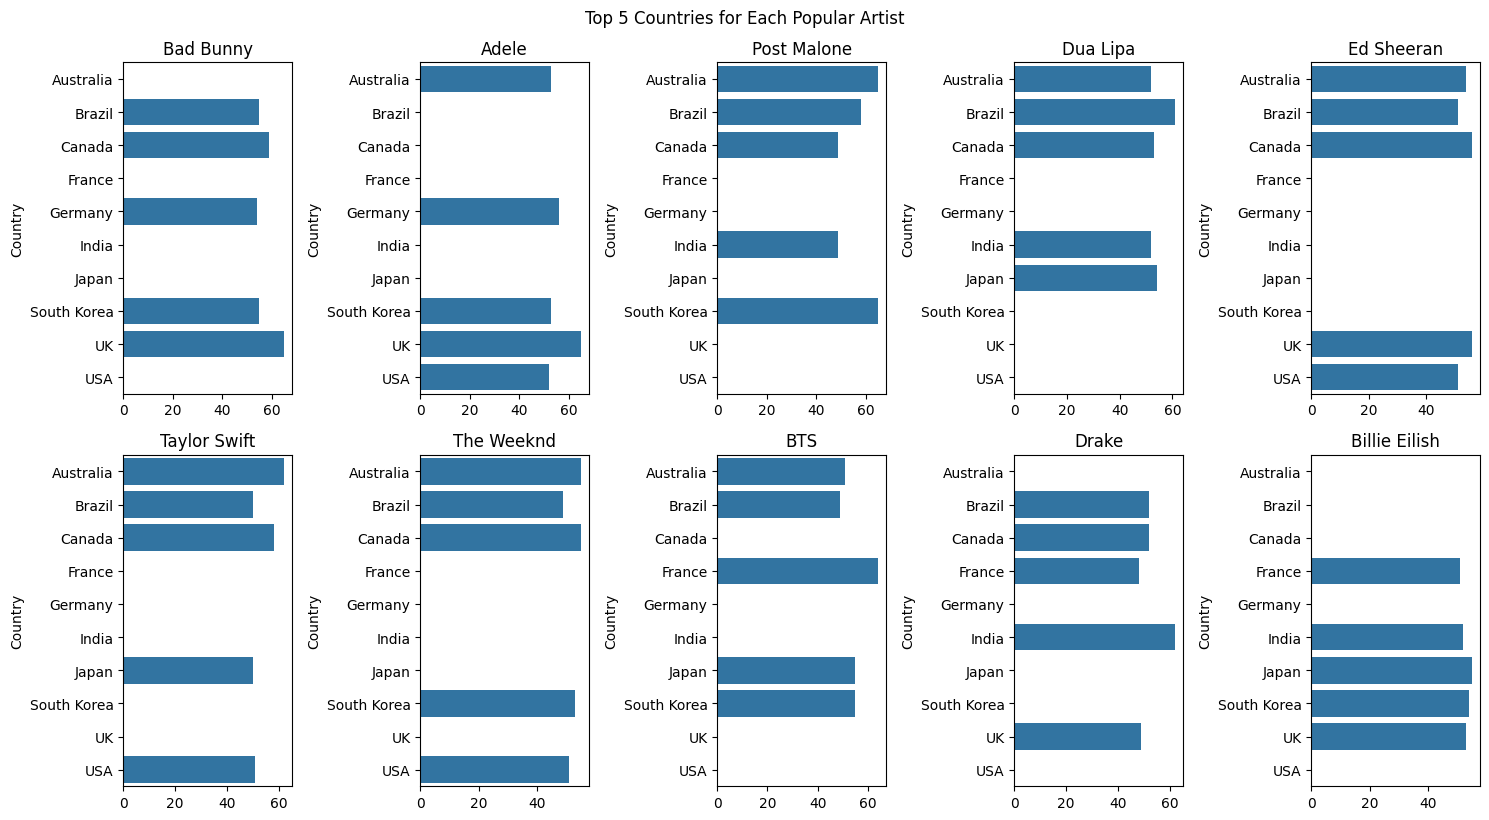

In [12]:
# Artist popularity by country
top_artists_list = top_artists.index.tolist()
plt.figure(figsize=(15, 8))
for i, artist in enumerate(top_artists_list):
    plt.subplot(2, 5, i+1)
    artist_countries = df[df['Most Played Artist'] == artist]['Country'].value_counts().head(5)
    sns.barplot(x=artist_countries.values, y=artist_countries.index)
    plt.title(artist)
    plt.tight_layout()
plt.suptitle('Top 5 Countries for Each Popular Artist', y=1.02)
plt.show()

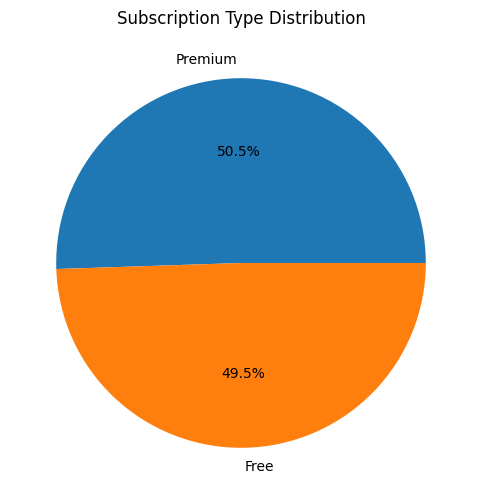

In [13]:
# Subscription type distribution
plt.figure(figsize=(8, 6))
df['Subscription Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Subscription Type Distribution')
plt.ylabel('')
plt.show()

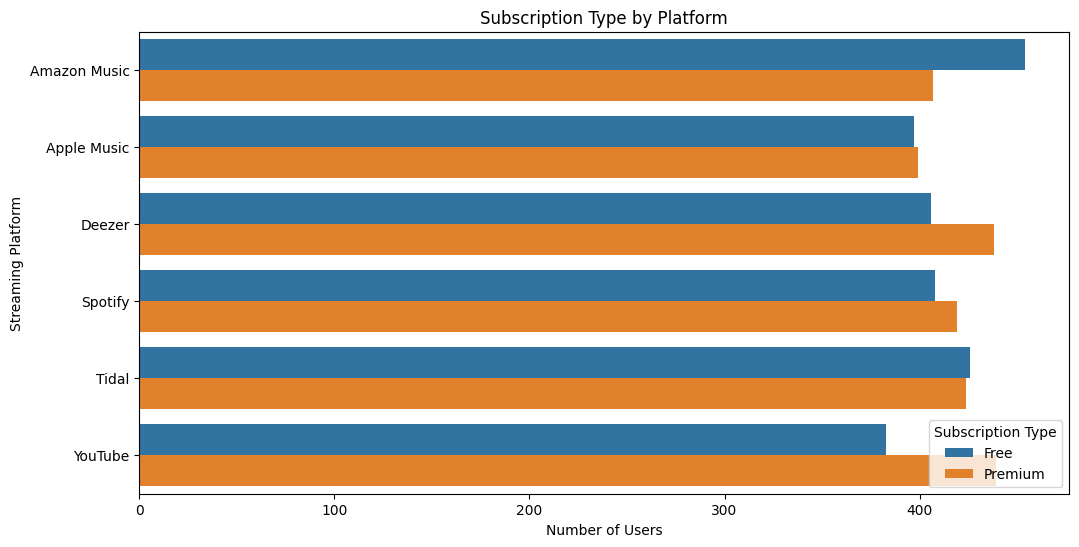

In [14]:
# Subscription by platform
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Streaming Platform', hue='Subscription Type')
plt.title('Subscription Type by Platform')
plt.xlabel('Number of Users')
plt.show()

<ipython-input-15-a6171a418b64>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_by_country = df.groupby(['Country', 'Subscription Type']).size().unstack().fillna(0)


<Figure size 1500x800 with 0 Axes>

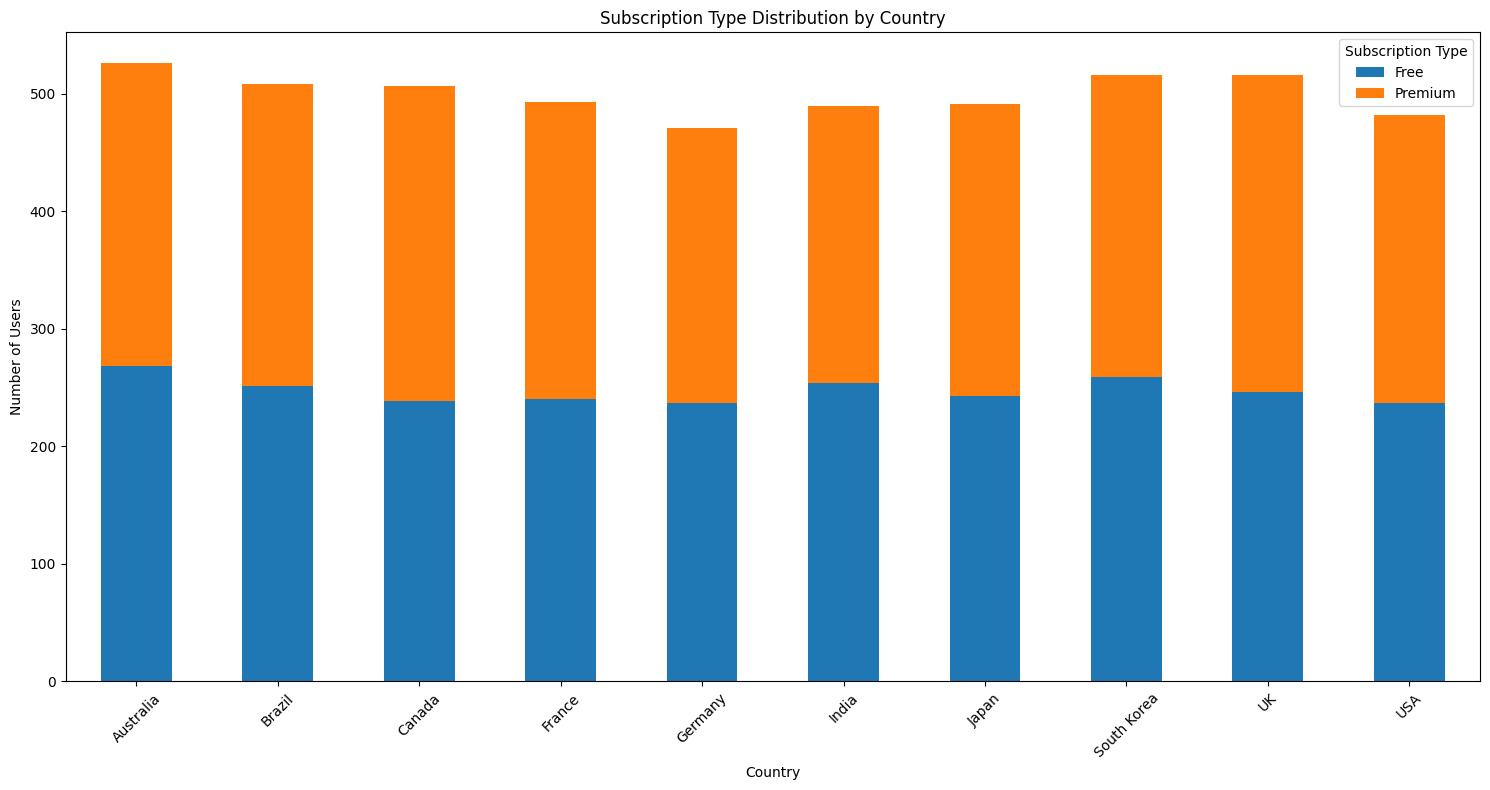

In [15]:
# Subscription by country
plt.figure(figsize=(15, 8))
subscription_by_country = df.groupby(['Country', 'Subscription Type']).size().unstack().fillna(0)
subscription_by_country.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Subscription Type Distribution by Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

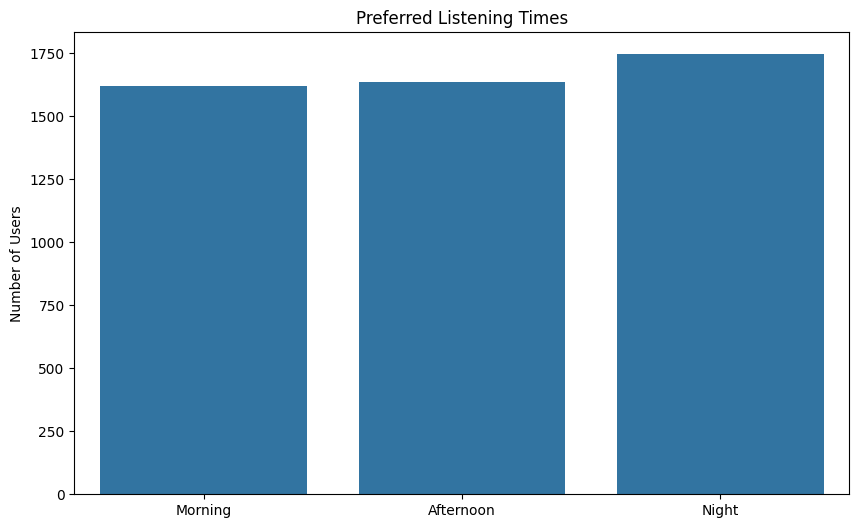

In [16]:
# Listening time distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Listening Time (Morning/Afternoon/Night)',
order=['Morning', 'Afternoon', 'Night'])
plt.title('Preferred Listening Times')
plt.xlabel('')
plt.ylabel('Number of Users')
plt.show()

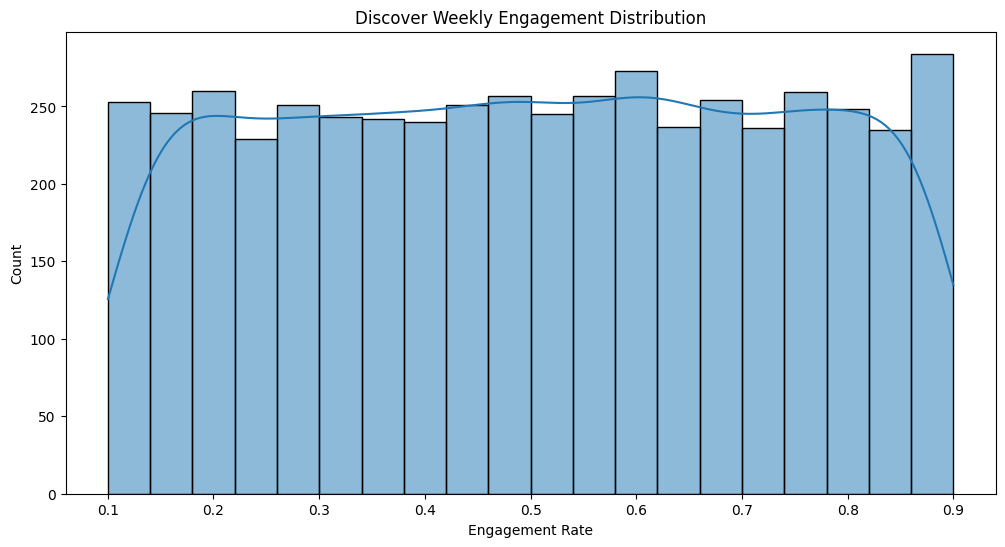

In [17]:
# Discover Weekly engagement
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Discover Weekly Engagement (%)', bins=20, kde=True)
plt.title('Discover Weekly Engagement Distribution')
plt.xlabel('Engagement Rate')
plt.show()

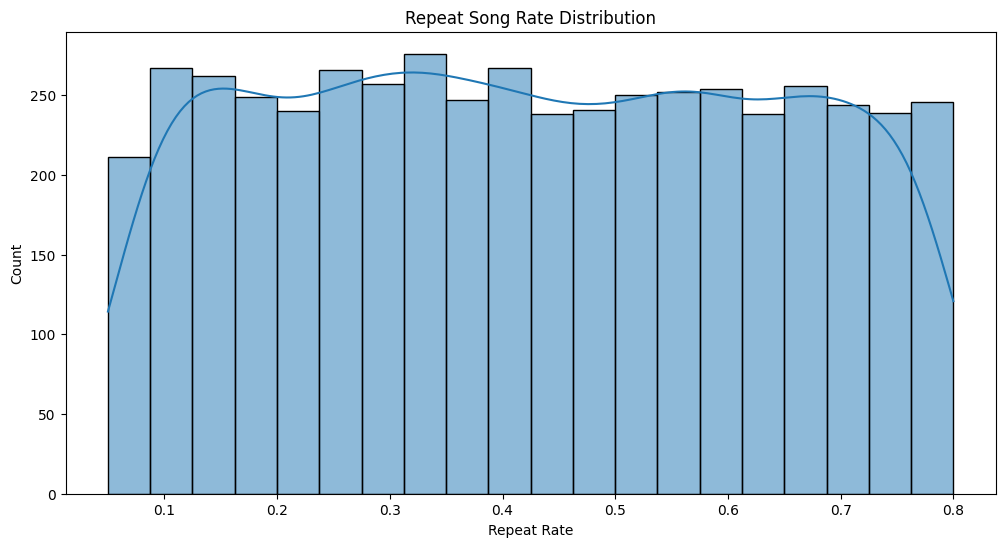

In [18]:
# Repeat song rate
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Repeat Song Rate (%)', bins=20, kde=True)
plt.title('Repeat Song Rate Distribution')
plt.xlabel('Repeat Rate')
plt.show()

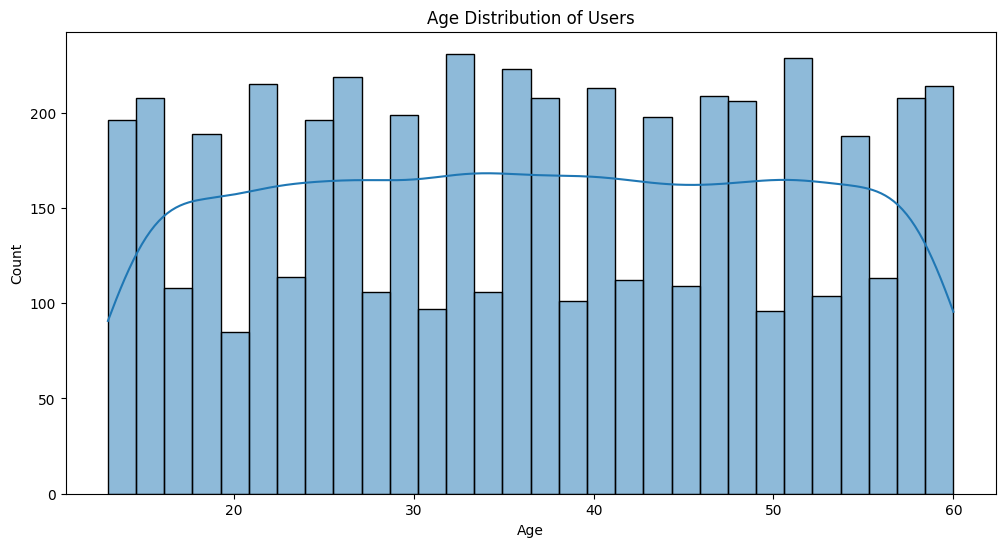

In [19]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.show()

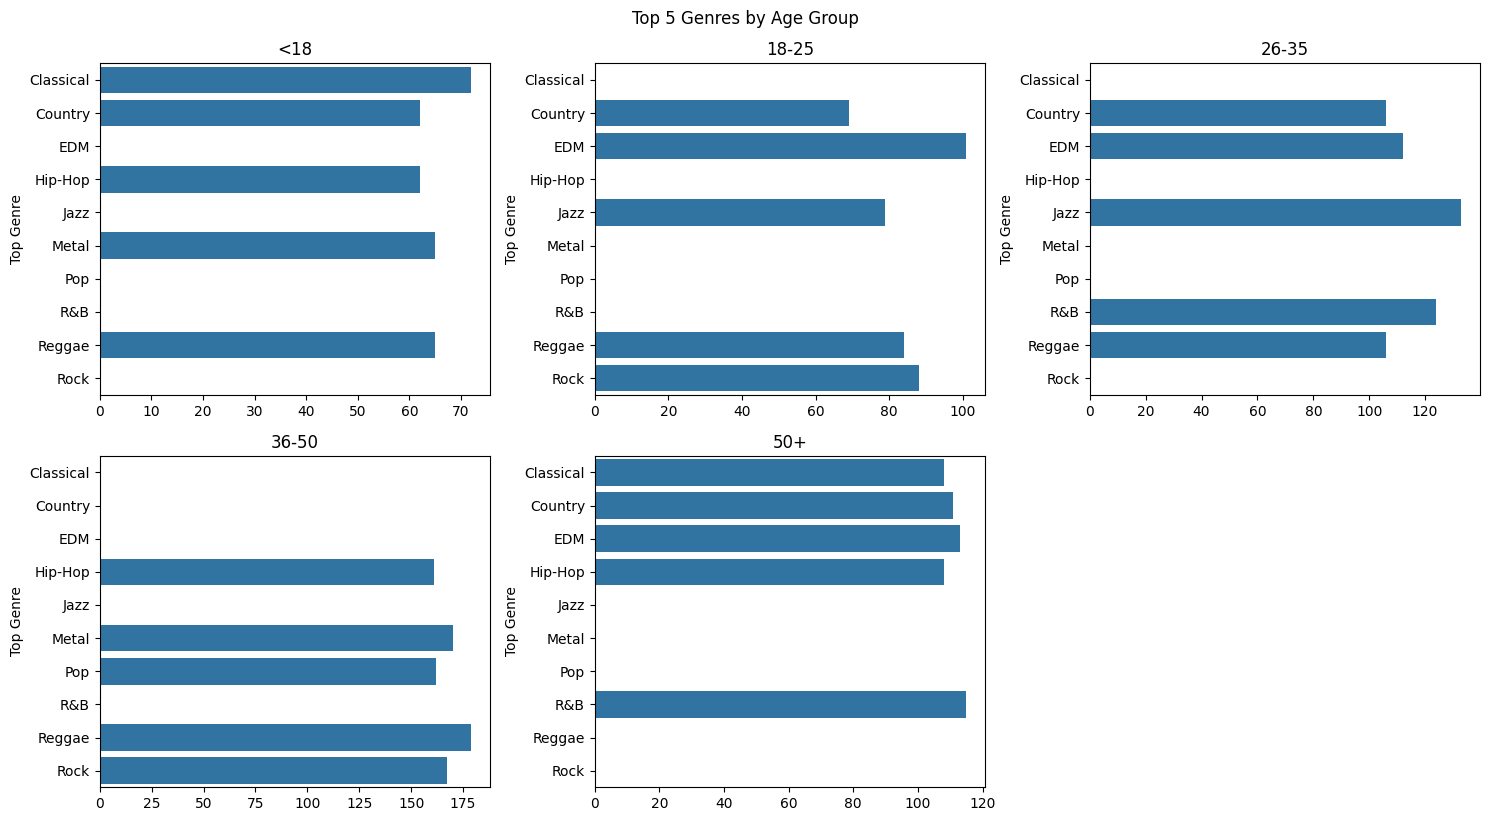

In [20]:
# Age groups by genre
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100],
labels=['<18', '18-25', '26-35', '36-50', '50+'])
plt.figure(figsize=(15, 8))
for i, age_group in enumerate(df['Age Group'].cat.categories):
    plt.subplot(2, 3, i+1)
    age_genres = df[df['Age Group'] == age_group]['Top Genre'].value_counts().head(5)
    sns.barplot(x=age_genres.values, y=age_genres.index)
    plt.title(age_group)
    plt.tight_layout()
plt.suptitle('Top 5 Genres by Age Group', y=1.02)
plt.show()

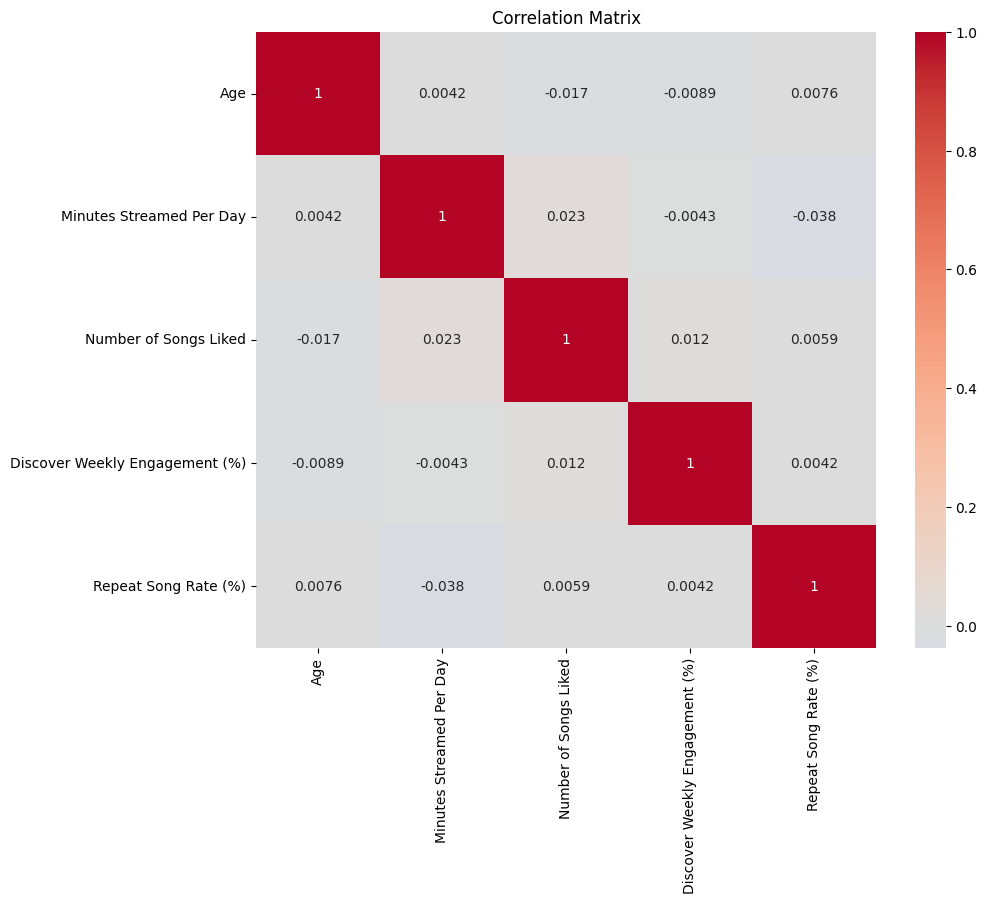

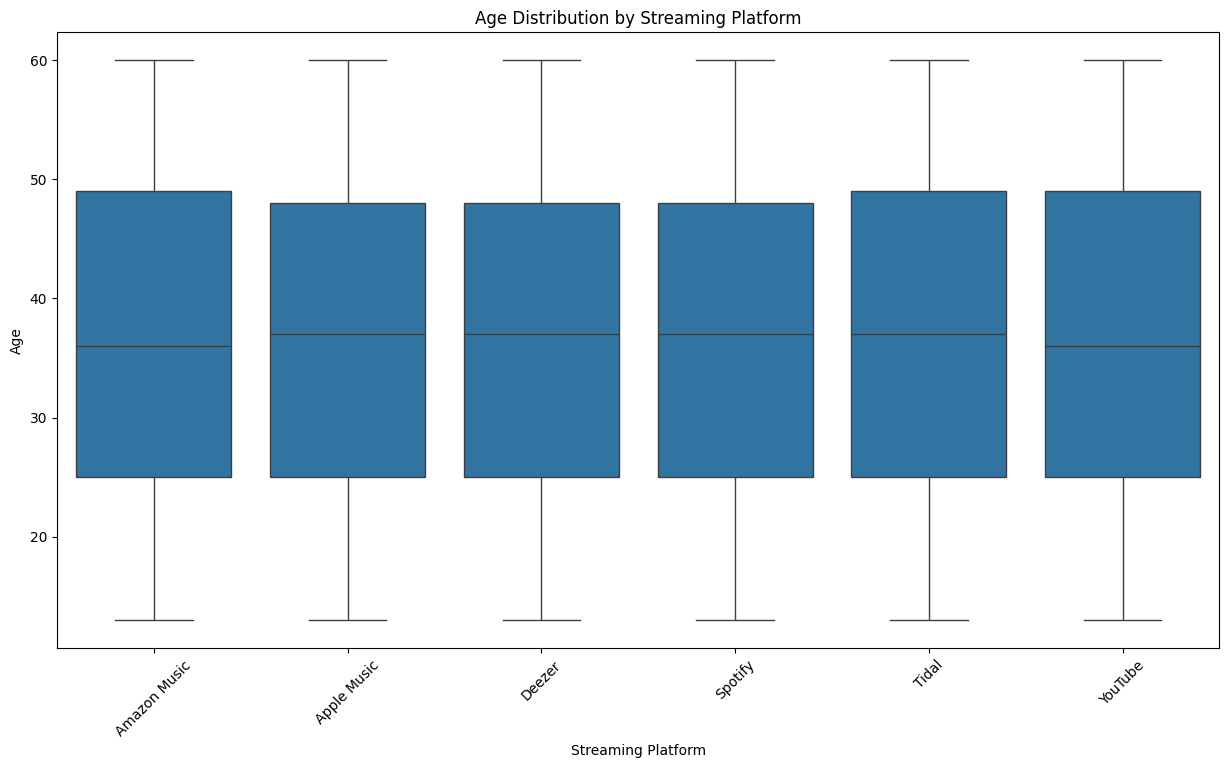

In [21]:
# Select numerical columns for correlation
numerical_cols = ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked',
'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Streaming Platform', y='Age')
plt.title('Age Distribution by Streaming Platform')
plt.xticks(rotation=45)
plt.show()

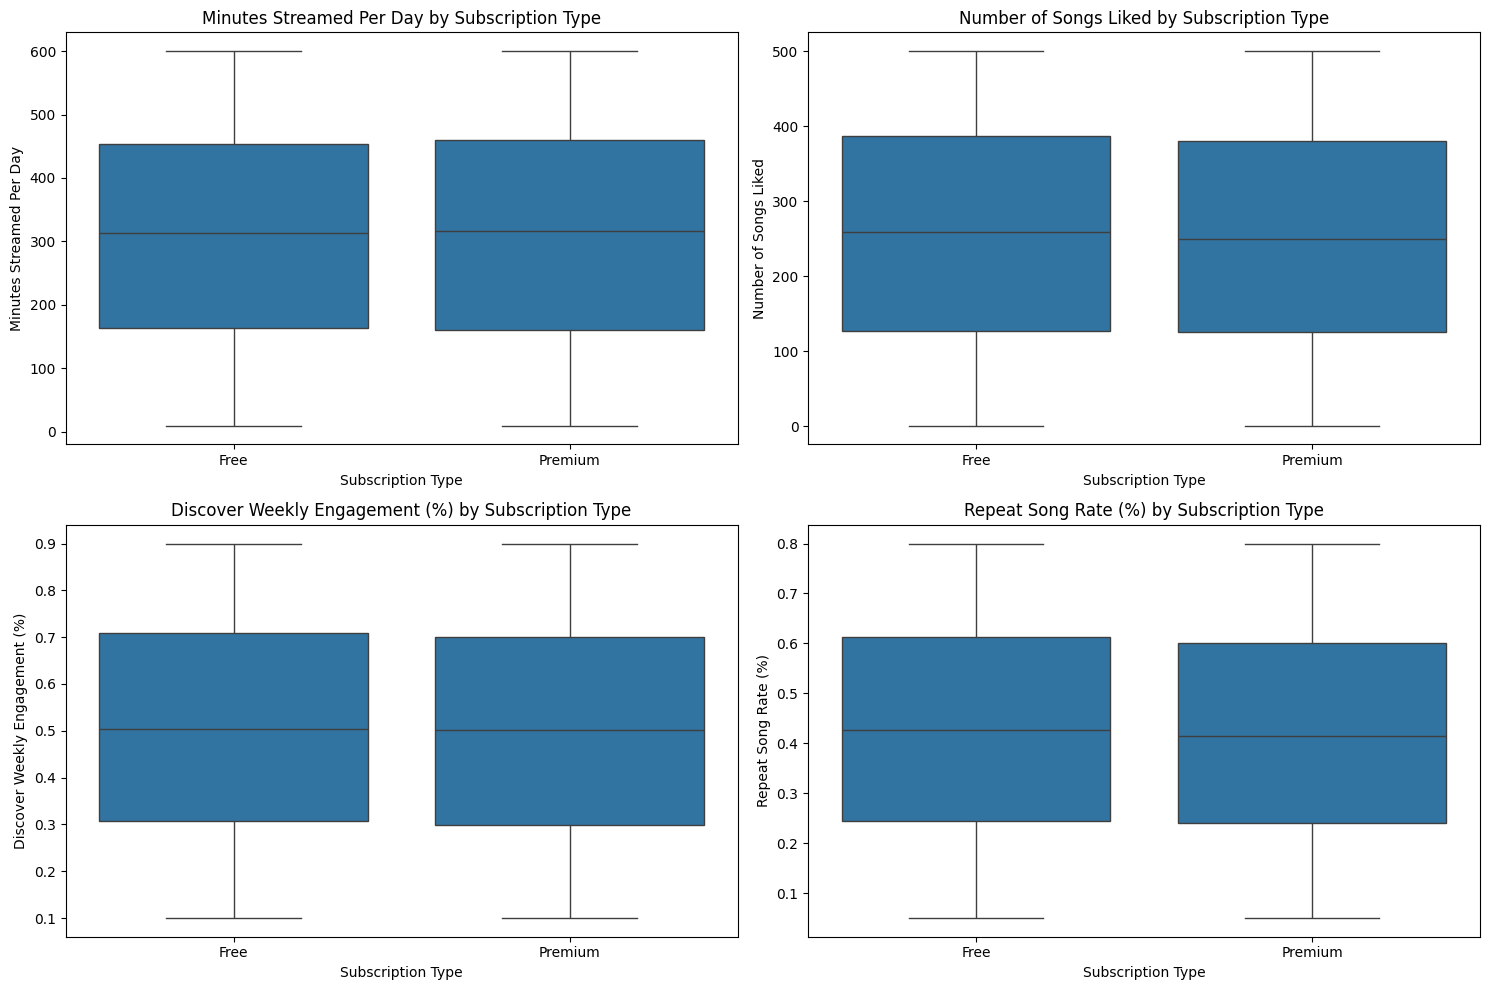

In [22]:
# Get top 5 genres
top_5_genres = df['Top Genre'].value_counts().head(5).index
# Compare metrics between premium and free users
metrics = ['Minutes Streamed Per Day', 'Number of Songs Liked',
'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x='Subscription Type', y=metric)
    plt.title(f'{metric} by Subscription Type')
plt.tight_layout()
plt.show()

In [24]:
india_data = df[df['Country'] == 'India']

# Assuming "Top Genre" includes 'English Pop', 'English Rock', etc.
# You may need to adapt this depending on how English songs are labeled in your dataset.
english_genres = ['Pop', 'Rock', 'Hip Hop', 'R&B']  # Most English genres
english_in_india = india_data[india_data['Top Genre'].isin(english_genres)]
print("Top Genres in India (Filtered for English Styles):")
print(english_in_india['Top Genre'].value_counts())

# Average Engagement and Repeat Rate for English genres
print("\nAverage Discover Weekly Engagement for English genres in India:")
print(english_in_india['Discover Weekly Engagement (%)'].mean() * 100)

print("\nAverage Repeat Song Rate for English genres in India:")
print(english_in_india['Repeat Song Rate (%)'].mean() * 100)

Top Genres in India (Filtered for English Styles):
Top Genre
Rock         46
R&B          45
Pop          40
Classical     0
Country       0
EDM           0
Metal         0
Jazz          0
Hip-Hop       0
Reggae        0
Name: count, dtype: int64

Average Discover Weekly Engagement for English genres in India:
0.5028343511450382

Average Repeat Song Rate for English genres in India:
0.4503847328244275


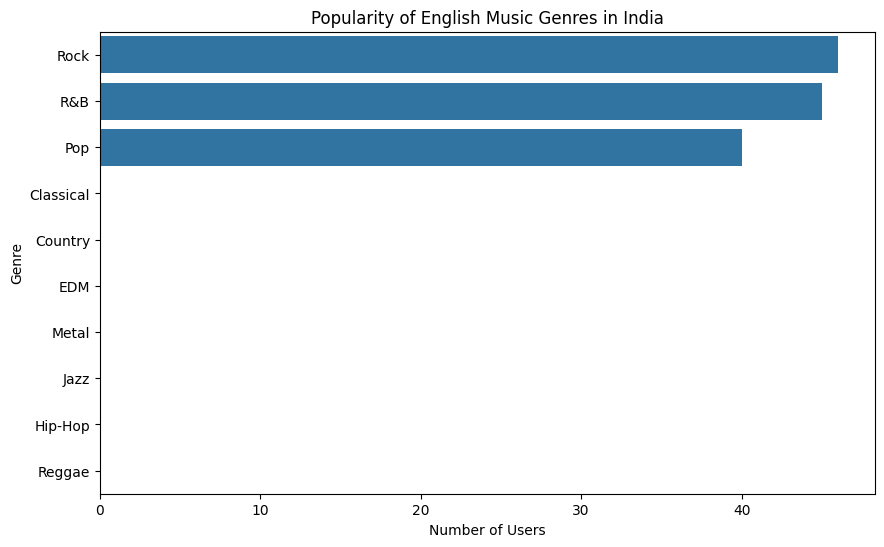

English genres have room for growth based on current engagement.


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=english_in_india, y='Top Genre', order=english_in_india['Top Genre'].value_counts().index)
plt.title("Popularity of English Music Genres in India")
plt.xlabel("Number of Users")
plt.ylabel("Genre")
plt.show()
if english_in_india['Discover Weekly Engagement (%)'].mean() > india_data['Discover Weekly Engagement (%)'].mean():
    print("English genres show higher than average engagement—indicating strong future potential in India.")
else:
    print("English genres have room for growth based on current engagement.")